In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn import model_selection #методы разделения и валидации
from sklearn import linear_model
from sklearn import tree
import sys
sys.path.append('/home/vadim/pythonw/')


plt.style.use('seaborn')
%matplotlib inline

In [2]:
df = pd.read_csv('data/water_potability.csv')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [3]:
df.isnull().mean()*100

ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64

In [4]:
df['ph'] = df['ph'].fillna(df.groupby('Potability')['ph'].transform('median'))
df['Sulfate'] = df['Sulfate'].fillna(df.groupby('Potability')['Sulfate'].transform('median'))
df['Trihalomethanes'] = df['Trihalomethanes'].fillna(df.groupby('Potability')['Trihalomethanes'].transform('median'))


In [5]:
df.isnull().mean()*100

ph                 0.0
Hardness           0.0
Solids             0.0
Chloramines        0.0
Sulfate            0.0
Conductivity       0.0
Organic_carbon     0.0
Trihalomethanes    0.0
Turbidity          0.0
Potability         0.0
dtype: float64

In [6]:
X = df.drop('Potability', axis=1)
y = df['Potability']

In [7]:
X_train, X_valid, y_train, y_valid = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
model = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_depth=7,
    min_samples_leaf=5,
    random_state=42
)

model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_valid_pred = model.predict(X_valid)

print(f'Train hold-out accuracy: {round(metrics.accuracy_score(y_train, y_train_pred), 2)}')
print(f'Validation hold-out accuracy: {round(metrics.accuracy_score(y_valid, y_valid_pred), 2)}')

Train hold-out accuracy: 0.82
Validation hold-out accuracy: 0.77


In [9]:
X_train, X_valid, y_train, y_valid = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)
X_valid, X_test, y_valid, y_test = model_selection.train_test_split(X_valid, y_valid, test_size=0.5, random_state=42)

In [10]:
model = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_depth=7,
    min_samples_leaf=5,
    random_state=42
)

kf = model_selection.KFold(n_splits=5)
train_metrics = []
val_metrics = []

for train_index, val_index in kf.split(X, y):
    X_train, y_train = X.iloc[train_index], y.iloc[train_index]
    X_valid, y_valid = X.iloc[val_index], y.iloc[val_index]
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_valid_pred = model.predict(X_valid)
    
    train_metrics.append(metrics.accuracy_score(y_train, y_train_pred))
    val_metrics.append(metrics.accuracy_score(y_valid, y_valid_pred))

In [11]:
print(train_metrics)
print(val_metrics)

[0.8034351145038168, 0.8168637924456315, 0.8027470431133156, 0.8267836703548264, 0.8157191911484166]
[0.7957317073170732, 0.7053435114503817, 0.7358778625954199, 0.7282442748091603, 0.732824427480916]


In [12]:
print(f'Train k-fold accuracy: {np.round(np.mean(train_metrics), 2)}')
print(f'Validation k-fold accuracy: {np.round(np.mean(val_metrics), 2)}')

Train k-fold accuracy: 0.81
Validation k-fold accuracy: 0.74


In [13]:
model = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_depth=7,
    min_samples_leaf=5,
    random_state=42
)

kf = model_selection.KFold(n_splits=5)

cv_metrics = model_selection.cross_validate(
    estimator=model,
    X=X,
    y=y,
    cv=kf,
    scoring='accuracy',
    return_train_score=True
)

display(cv_metrics)

{'fit_time': array([0.03484917, 0.03296137, 0.03329778, 0.02329183, 0.0259726 ]),
 'score_time': array([0.0040946 , 0.00279617, 0.00247526, 0.00180721, 0.00149751]),
 'test_score': array([0.79573171, 0.70534351, 0.73587786, 0.72824427, 0.73282443]),
 'train_score': array([0.80343511, 0.81686379, 0.80274704, 0.82678367, 0.81571919])}

In [14]:
model = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_depth=7,
    min_samples_leaf=5, 
    random_state=42
)

loo = model_selection.LeaveOneOut()

cv_metrics = model_selection.cross_validate(
    estimator=model,
    X=X,
    y=y,
    cv=loo,
    scoring='accuracy',
    return_train_score=True
)

print(np.mean(cv_metrics['train_score']))
print(np.mean(cv_metrics['test_score']))

0.810928054134161
0.7588522588522588


0    0.60989
1    0.39011
Name: Potability, dtype: float64


<AxesSubplot:xlabel='Potability', ylabel='count'>

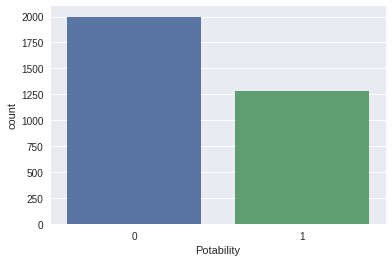

In [15]:
print(df['Potability'].value_counts(normalize=True))
sns.countplot(data=df, x='Potability')

In [16]:
X_train, X_valid, y_train, y_valid = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)
print('Train:\n', y_train.value_counts(normalize=True), sep='')
print('Test: \n', y_valid.value_counts(normalize=True), sep='')

Train:
0    0.605344
1    0.394656
Name: Potability, dtype: float64
Test: 
0    0.628049
1    0.371951
Name: Potability, dtype: float64


In [17]:
X_train, X_valid, y_train, y_valid = model_selection.train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
print('Train:\n', y_train.value_counts(normalize=True), sep='')
print('Test: \n', y_valid.value_counts(normalize=True), sep='')

Train:
0    0.609924
1    0.390076
Name: Potability, dtype: float64
Test: 
0    0.609756
1    0.390244
Name: Potability, dtype: float64


In [18]:
skf = model_selection.StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

for train_index, val_index in skf.split(X, y):
    X_train, y_train = X.iloc[train_index], y.iloc[train_index]
    X_valid, y_valid = X.iloc[val_index], y.iloc[val_index]
    print('Train:\n', y_train.value_counts(normalize=True), sep='')
    print('Valid:\n', y_valid.value_counts(normalize=True), sep='')

Train:
0    0.60989
1    0.39011
Name: Potability, dtype: float64
Valid:
0    0.60989
1    0.39011
Name: Potability, dtype: float64
Train:
0    0.60989
1    0.39011
Name: Potability, dtype: float64
Valid:
0    0.60989
1    0.39011
Name: Potability, dtype: float64
Train:
0    0.60989
1    0.39011
Name: Potability, dtype: float64
Valid:
0    0.60989
1    0.39011
Name: Potability, dtype: float64


In [19]:
X_train, X_valid, y_train, y_valid = model_selection.train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

model = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_depth=7,
    min_samples_leaf=5,
    random_state=42
)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_valid_pred = model.predict(X_valid)

print(metrics.classification_report(y_valid, y_valid_pred))

              precision    recall  f1-score   support

           0       0.76      0.92      0.83       400
           1       0.81      0.55      0.65       256

    accuracy                           0.77       656
   macro avg       0.78      0.73      0.74       656
weighted avg       0.78      0.77      0.76       656



In [20]:
model = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_depth=7,
    min_samples_leaf=5,
    random_state=42,
    class_weight='balanced'
)

model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_valid_pred = model.predict(X_valid)

print(metrics.classification_report(y_valid, y_valid_pred))

              precision    recall  f1-score   support

           0       0.82      0.71      0.76       400
           1       0.63      0.76      0.69       256

    accuracy                           0.73       656
   macro avg       0.72      0.73      0.72       656
weighted avg       0.74      0.73      0.73       656



In [28]:
model = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_depth=7,
    min_samples_leaf=5,
    random_state=42
)

model.fit(X_train, y_train)

skf = model_selection.StratifiedKFold(n_splits=5)

y_cv_proba_pred = model_selection.cross_val_predict(model, X_train, y_train, cv=skf, method='predict_proba') 

In [29]:
y_cv_proba_pred = y_cv_proba_pred[:,1]

In [30]:
y_cv_proba_pred

array([1.        , 0.75438596, 0.        , ..., 0.39378238, 0.        ,
       0.96969697])

In [32]:
precission, recall, threholds = metrics.precision_recall_curve(y_train, y_cv_proba_pred)

print('Threholds: ', threholds[:5])
print('Precision: ', precission[:5])
print('Recall: ', recall[:5])

Threholds:  [0.         0.02739726 0.02898551 0.05       0.07407407]
Precision:  [0.39007634 0.50050659 0.50357873 0.50437919 0.5043837 ]
Recall:  [1.         0.9667319  0.96379648 0.95792564 0.95694716]


Best threholds = 0.33, f1_score = 0.69


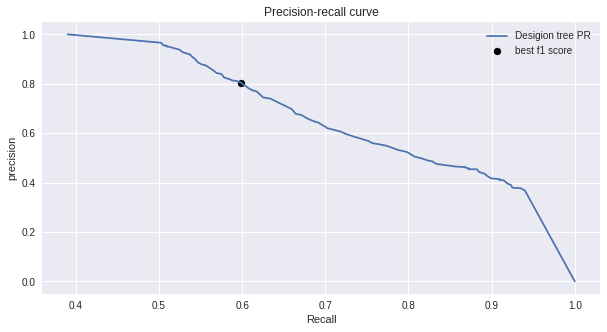

In [35]:
f1_score = 2*precission*recall/(precission+recall)
idx = np.argmax(f1_score)

print(f'Best threholds = {round(threholds[idx], 2)}, f1_score = {round(f1_score[idx], 2)}')

fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(precission, recall, label='Desigion tree PR')
ax.scatter(precission[idx], recall[idx], label='best f1 score', marker='o', color='black')
ax.set_title('Precision-recall curve')
ax.set_xlabel('Recall')
ax.set_ylabel('precision')
ax.legend()

In [36]:
y_valid_pred_proba = model.predict_proba(X_valid)[:,1]
threhold_opt = threholds[idx]
y_valid_pred = (y_valid_pred_proba > threhold_opt).astype(int)
print(metrics.classification_report(y_valid, y_valid_pred))

              precision    recall  f1-score   support

           0       0.82      0.71      0.76       400
           1       0.62      0.76      0.68       256

    accuracy                           0.73       656
   macro avg       0.72      0.73      0.72       656
weighted avg       0.74      0.73      0.73       656



In [39]:
from imblearn.over_sampling import SMOTE

In [40]:
sm = SMOTE(random_state=2)
X_train_s, y_train_s = sm.fit_resample(X_train, y_train)
print('Before oversampling: ', X_train.shape)
print('Balance before oversampling: \n', y_train.value_counts(), sep='')
print('-'*40)
print('After oversampling: ', X_train_s.shape)
print('Balance after oversampling: \n', y_train_s.value_counts(), sep='')

Before oversampling:  (2620, 9)
Balance before oversampling: 
0    1598
1    1022
Name: Potability, dtype: int64
----------------------------------------
After oversampling:  (3196, 9)
Balance after oversampling: 
0    1598
1    1598
Name: Potability, dtype: int64


In [41]:
model = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_depth=7,
    min_samples_leaf=5,
    random_state=42
)
model.fit(X_train_s, y_train_s)
y_train_pred = model.predict(X_train)
y_valid_pred = model.predict(X_valid)

print(metrics.classification_report(y_valid, y_valid_pred))

              precision    recall  f1-score   support

           0       0.83      0.70      0.76       400
           1       0.63      0.78      0.69       256

    accuracy                           0.73       656
   macro avg       0.73      0.74      0.73       656
weighted avg       0.75      0.73      0.73       656



In [42]:
X_train, X_valid, y_train, y_valid = model_selection.train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

model_bad = tree.DecisionTreeClassifier(
    criterion='entropy',
    class_weight='balanced',
    random_state=42
)
model_bad.fit(X_train, y_train)
y_train_pred = model_bad.predict(X_train)
y_valid_pred = model_bad.predict(X_valid)

print('Train f1 score: ', metrics.f1_score(y_train, y_train_pred))
print('Valid f1 score: ', metrics.f1_score(y_valid, y_valid_pred))

Train f1 score:  1.0
Valid f1 score:  0.6666666666666666


In [43]:
skf = model_selection.KFold(n_splits=5)

cv_metrics = model_selection.cross_validate(
    estimator=model_bad,
    X=X,
    y=y,
    cv=skf,
    scoring='f1',
    return_train_score=True
)
display(cv_metrics)

{'fit_time': array([0.03626442, 0.03021431, 0.03112483, 0.02508879, 0.0248239 ]),
 'score_time': array([0.00399065, 0.00211501, 0.00192189, 0.00197291, 0.00186038]),
 'test_score': array([0.56041131, 0.64755481, 0.6468254 , 0.60995851, 0.71812081]),
 'train_score': array([1., 1., 1., 1., 1.])}

In [44]:
print('depth: ', model_bad.get_depth())

depth:  26


In [62]:
model = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_depth=7,
    min_samples_leaf=5,
    random_state=42,
    class_weight='balanced'
)

skf = model_selection.StratifiedKFold(n_splits=5)

cv_metrics = model_selection.cross_validate(
    estimator=model,
    X=X,
    y=y,
    cv=skf,
    scoring='f1',
    return_train_score=True
)

print('Train kfold f1 score: ', round(np.mean(cv_metrics['train_score']), 2))
print('Valid kfold f1 score: ', round(np.mean(cv_metrics['test_score']), 2))

Train kfold f1 score:  0.74
Valid kfold f1 score:  0.66


In [64]:
model = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_depth=7,
    min_samples_leaf=5,
    random_state=42,
    class_weight='balanced'
)

skf = model_selection.StratifiedKFold(n_splits=5)

train_size, train_scores, valid_scores = model_selection.learning_curve(
    estimator=model,
    X=X,
    y=y,
    cv=skf,
    scoring='f1'
)

print('train_size: ', train_size)
print('train scores: ', train_scores)
print('valid scores: ', valid_scores)

train_size:  [ 262  851 1441 2030 2620]
train scores:  [[0.8        0.72727273 0.72727273 0.72727273 0.72727273]
 [0.76156584 0.82522523 0.8757764  0.8757764  0.8757764 ]
 [0.78546099 0.80108011 0.78497653 0.78183613 0.78183613]
 [0.75440806 0.74526573 0.72822528 0.76443265 0.75997384]
 [0.73336393 0.75992939 0.72322275 0.74051593 0.76085963]]
valid scores:  [[0.62222222 0.2228739  0.18128655 0.25329815 0.28486647]
 [0.64528302 0.4978903  0.46031746 0.53831776 0.56928839]
 [0.59622642 0.60687023 0.60805861 0.56624319 0.60820896]
 [0.60903733 0.68641115 0.63859649 0.59344894 0.67407407]
 [0.61981982 0.6797153  0.66294227 0.61689587 0.71719039]]


In [65]:
train_scores_mean = np.mean(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)

print('Train kfold f1 scores: ', train_scores_mean)
print('valid kfold f1 scores: ', valid_scores_mean)


Train kfold f1 scores:  [0.74181818 0.84282405 0.78703798 0.75046111 0.74357833]
valid kfold f1 scores:  [0.31290946 0.54221938 0.59712148 0.6403136  0.65931273]


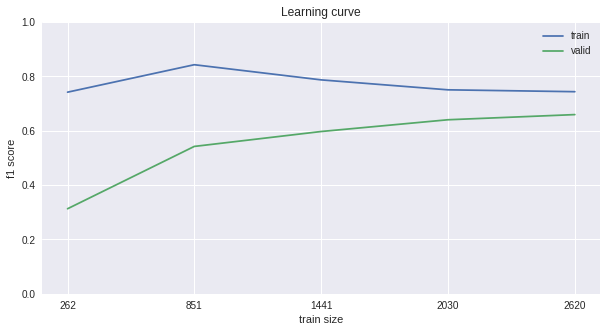

In [67]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(train_size, train_scores_mean, label='train')
ax.plot(train_size, valid_scores_mean, label='valid')
ax.set_title('Learning curve')
ax.set_xlabel('train size')
ax.set_ylabel('f1 score')
ax.xaxis.set_ticks(train_size)
ax.set_ylim(0, 1)
ax.legend()

In [118]:
from libs import my_plots
import imp
imp.reload(my_plots)  

<module 'libs.my_plots' from '/home/vadim/pythonw/libs/my_plots.py'>

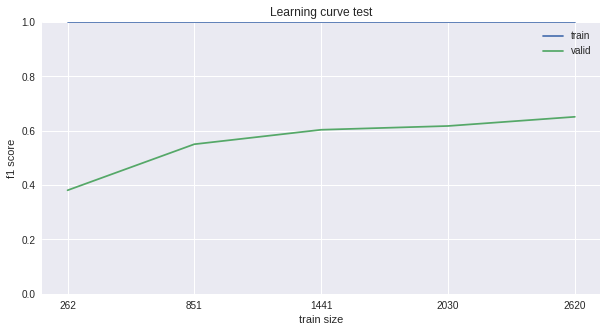

In [119]:
my_plots.plot_learning_curve(model, X, y, skf, title='test')


In [91]:
models = [
    linear_model.LogisticRegression(
        max_iter=1000,
        random_state=42,
        class_weight='balanced'
    ),
    tree.DecisionTreeClassifier(
        criterion='entropy',
        max_depth=7,
        min_samples_leaf=5,
        random_state=42,
        class_weight='balanced'
    ),
    tree.DecisionTreeClassifier(
        criterion='entropy',
        random_state=42,
        class_weight='balanced'
    )
]

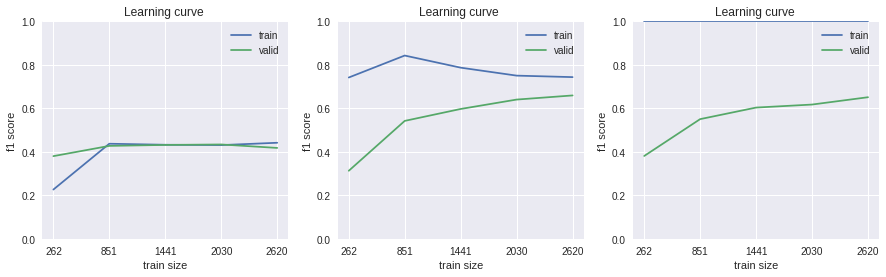

In [120]:
skf = model_selection.StratifiedKFold(n_splits=5)

fig, ax = plt.subplots(1, 3, figsize=(15,4))

for i, model in enumerate(models):
    my_plots.plot_learning_curve(model, X, y, skf, scoring='f1', ax=ax[i])